<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/Portfolio_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#THIS prog is fro calculating the daily portfolio returns and other values

In [2]:
!pip install yf
import yfinance as yf

In [3]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Creating an array of stocks for the portfolio
stockSymbols=["META","AMZN","AAPL","NFLX","GOOG"]

In [5]:
stockStartDate='2013-01-01'
today=datetime.today().strftime('%Y-%m-%d')
print(today)

2024-08-12


In [6]:
#Display the number of assets in portfolio
numAssets=len(stockSymbols)
print('You have '+ str(numAssets) +' stocks in your portfolio' )

You have 5 stocks in your portfolio


In [7]:
def getMyPortfolio(stocks=stockSymbols,start=stockStartDate,end=today):
  data_main=yf.download(stocks,start,end)
  data=data_main['Adj Close']
  return data

In [8]:
my_stocks=getMyPortfolio(stockSymbols)
print(my_stocks)

[*********************100%%**********************]  5 of 5 completed

Ticker            AAPL        AMZN        GOOG        META        NFLX
Date                                                                  
2013-01-02   16.725039   12.865500   17.993254   27.942579   13.144286
2013-01-03   16.513933   12.924000   18.003704   27.713053   13.798571
2013-01-04   16.053942   12.957500   18.359463   28.701021   13.711429
2013-01-07   15.959502   13.423000   18.279356   29.359669   14.171429
2013-01-08   16.002451   13.319000   18.243282   29.000406   13.880000
...                ...         ...         ...         ...         ...
2024-08-05  209.270004  161.020004  160.639999  475.730011  598.549988
2024-08-06  207.229996  161.929993  160.539993  494.089996  609.570007
2024-08-07  209.820007  162.770004  160.750000  488.920013  611.479980
2024-08-08  213.309998  165.800003  163.839996  509.630005  630.349976
2024-08-09  216.240005  166.940002  165.389999  517.770020  633.940002

[2921 rows x 5 columns]


In [9]:
def showGraph(my_stocks):

  ##TITLE
  title="Porfolio Adj Price history"

  ##Give fig size
  plt.figure(figsize=(12.5,4.5))
  ##Loop through and plot the price
  for c in my_stocks.columns:
    plt.plot(my_stocks[c],label=c)

    plt.title(title)
    plt.ylabel('Adj closing price (in $USD)')
    plt.xlabel('Time')
    plt.legend(my_stocks.columns.values,loc="upper left")
    plt.show

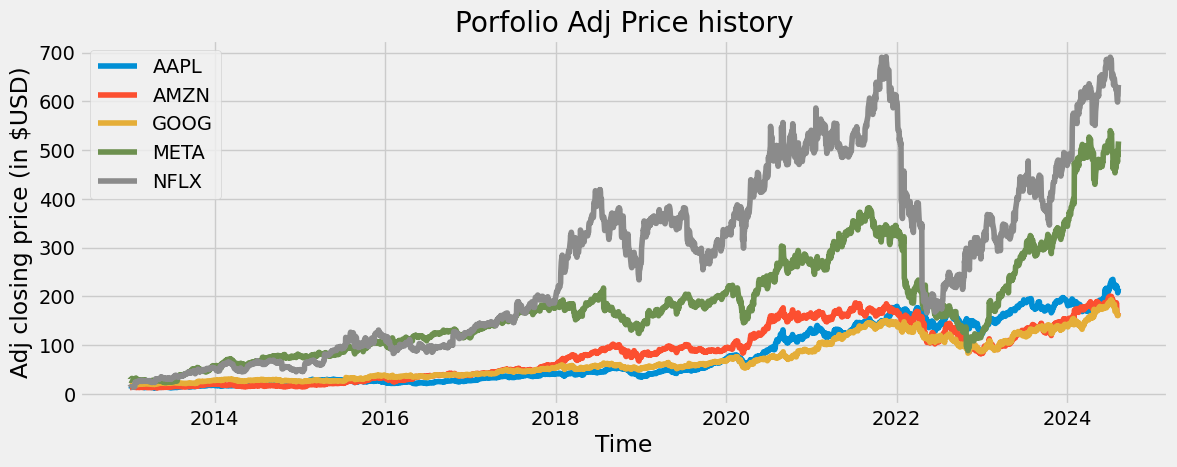

In [10]:
showGraph(my_stocks)

In [11]:
#Daily returns
daily_simple_returns=my_stocks.pct_change(1)
print(daily_simple_returns)

Ticker          AAPL      AMZN      GOOG      META      NFLX
Date                                                        
2013-01-02       NaN       NaN       NaN       NaN       NaN
2013-01-03 -0.012622  0.004547  0.000581 -0.008214  0.049777
2013-01-04 -0.027855  0.002592  0.019760  0.035650 -0.006315
2013-01-07 -0.005883  0.035925 -0.004363  0.022949  0.033549
2013-01-08  0.002691 -0.007748 -0.001973 -0.012237 -0.020565
...              ...       ...       ...       ...       ...
2024-08-05 -0.048167 -0.040977 -0.046081 -0.025423 -0.024591
2024-08-06 -0.009748  0.005651 -0.000623  0.038593  0.018411
2024-08-07  0.012498  0.005187  0.001308 -0.010464  0.003133
2024-08-08  0.016633  0.018615  0.019222  0.042359  0.030860
2024-08-09  0.013736  0.006876  0.009460  0.015972  0.005695

[2921 rows x 5 columns]


In [12]:
#showing correlation
daily_simple_returns.corr()

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,1.000000,0.492036,0.555248,0.464671,0.319037
AMZN,0.492036,1.000000,0.623277,0.548449,0.468250
GOOG,0.555248,0.623277,1.000000,0.581515,0.418184
META,0.464671,0.548449,0.581515,1.000000,0.399321
NFLX,0.319037,0.468250,0.418184,0.399321,1.000000


In [13]:
#covariance matrix for daily returns
daily_simple_returns.cov()

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,0.000316,0.000179,0.000171,0.000201,0.000165
AMZN,0.000179,0.000417,0.000220,0.000272,0.000278
GOOG,0.000171,0.000220,0.000300,0.000244,0.000211
META,0.000201,0.000272,0.000244,0.000589,0.000282
NFLX,0.000165,0.000278,0.000211,0.000282,0.000847


In [14]:
#variance
daily_simple_returns.var()

,0
Ticker,
AAPL,0.000316
AMZN,0.000417
GOOG,0.000300
META,0.000589
NFLX,0.000847


In [15]:
#stock volatility
print("The stock volatility is : ")
daily_simple_returns.std()

The stock volatility is : 


,0
Ticker,
AAPL,0.017776
AMZN,0.020415
GOOG,0.017312
META,0.024273
NFLX,0.029100


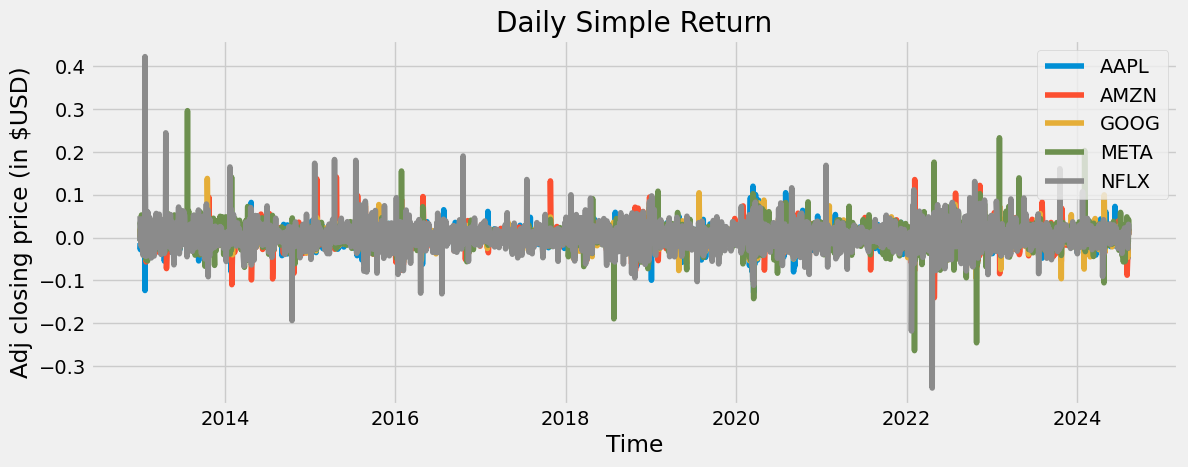

In [16]:
#visualise the daily simple
plt.figure(figsize=(12.5,4.5))
title1='Daily Simple Return'
for c in daily_simple_returns.columns:

  plt.plot(daily_simple_returns[c],label=c)

  plt.title(title1)
  plt.ylabel('Adj closing price (in $USD)')
  plt.xlabel('Time')
  plt.legend(daily_simple_returns.columns.values,loc="upper right")
  plt.show

In [17]:
#mean of daily simple returns
daily_simple_returns_mean=daily_simple_returns.mean()

In [18]:
###If we want random weights
random_weights=np.random.rand(5)
print(random_weights)

[0.68971591 0.06364468 0.02908837 0.98875677 0.71391723]


In [19]:
#Fixed weights
randomWeight=np.array([0.4,.1,.3,.1,.1])

In [26]:
#total portfolio returns
total_returns=np.sum(daily_simple_returns_mean*randomWeight)
total_annualised=total_returns*253

print("The expected portfolio value is "+str(total_returns))
print("The expected annualised returns is "+str(total_annualised))

The expected portfolio value is 0.0010997077297285663
The expected annualised returns is 0.2782260556213273


In [21]:
dailycumsimplereturns= (daily_simple_returns+1).cumprod()
dailycumsimplereturns

Ticker,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.987378,1.004547,1.000581,0.991786,1.049777
2013-01-04,0.959875,1.007151,1.020353,1.027143,1.043147
2013-01-07,0.954228,1.043333,1.015901,1.050714,1.078144
2013-01-08,0.956796,1.035249,1.013896,1.037857,1.055972
...,...,...,...,...,...
2024-08-05,12.512378,12.515643,8.927790,17.025272,45.536896
2024-08-06,12.390405,12.586373,8.922233,17.682333,46.375284
2024-08-07,12.545263,12.651665,8.933904,17.497311,46.520593


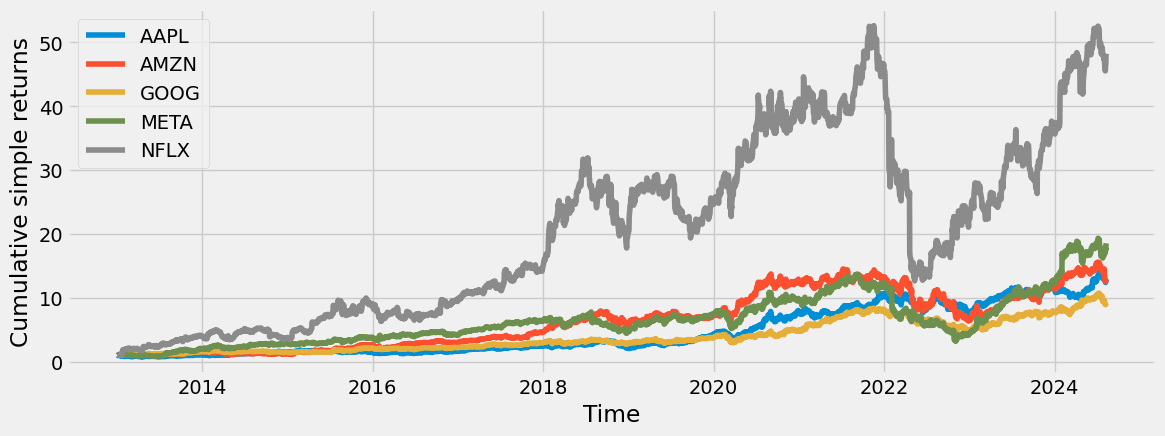

In [22]:
plt.figure(figsize=(12.5,4.5))
title2='Cumulative simple returns'
for c in dailycumsimplereturns.columns:
  plt.plot(dailycumsimplereturns[c],label=c)
plt.xlabel('Time')
plt.ylabel('Cumulative simple returns')
plt.legend(dailycumsimplereturns.columns.values,loc="upper left")
plt.show()

In [23]:
cov_matrix_annual=daily_simple_returns.cov()*252
cov_matrix_annual

Ticker,AAPL,AMZN,GOOG,META,NFLX
Ticker,,,,,
AAPL,0.079632,0.044997,0.043061,0.050527,0.041589
AMZN,0.044997,0.105024,0.055511,0.068488,0.070101
GOOG,0.043061,0.055511,0.075528,0.061581,0.053091
META,0.050527,0.068488,0.061581,0.148478,0.071081
NFLX,0.041589,0.070101,0.053091,0.071081,0.213402


In [24]:
#this is the portfolio variance
port_variance=np.dot(randomWeight.T,np.dot(cov_matrix_annual,randomWeight))
port_variance

0.05991572825591441

In [25]:
#Calculating the portfolio volatility
port_volatility=np.sqrt(port_variance)
port_volatility

0.24477689485716256

In [28]:
#Show the expected annual return , colatility(risk) and variance

percent_var=str(round(port_variance,2)*100)+"%"
percent_vol=str(round(port_volatility,2)*100)+"%"
percent_ret=str(round(total_annualised,2)*100)+"%"

print("Expected variance is "+ percent_var)
print("Expected volatility/risk is "+ percent_vol)
print("Expected annual return is "+ percent_ret)

Expected variance is 6.0%
Expected volatility/risk is 24.0%
Expected annual return is 28.000000000000004%


In [29]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.9 MB/s eta 0:00:00


In [31]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [35]:
#from here we do the portfolio optimisation

mu=expected_returns.mean_historical_return(my_stocks)
S=risk_models.sample_cov(my_stocks)

#optimising for max sharpe ratio

ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()

print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.45498), ('AMZN', 0.07353), ('GOOG', 0.04245), ('META', 0.1245), ('NFLX', 0.30454)])
Expected annual return: 29.6%
Annual volatility: 27.1%
Sharpe Ratio: 1.02


(0.2962722594638897, 0.2708476599118342, 1.0200282311976456)

In [36]:
#get the latest discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices=get_latest_prices(my_stocks)
weights=cleaned_weights

da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=15000)
allocation,leftover=da.lp_portfolio()

print("Discrete Allocation : ",allocation)
print("Funds left : ${:.2f}".format(leftover))

Discrete Allocation :  {'AAPL': 31, 'AMZN': 6, 'GOOG': 4, 'META': 4, 'NFLX': 7}
Funds left : $124.70
